# 2021-2023 피해 이륜 차종 데이터 (14944 rows)

## 데이터프레임 불러오기(21_23피해이륜차종.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

victim_df=pd.read_csv('21_23피해이륜차종.csv', encoding='utf-8')
victim_df

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2021010100100015,2021년 1월 1일 01시,금요일,서울특별시 강북구 미아동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,57세,상해없음,이륜,남,26세,경상
1,2021010100100060,2021년 1월 1일 11시,금요일,서울특별시 중랑구 중화동,중상사고,0,1,0,0,차대차 - 기타,...,맑음,교차로 - 교차로안,화물,남,67세,상해없음,이륜,남,60세,중상
2,2021010100100098,2021년 1월 1일 14시,금요일,서울특별시 금천구 독산동,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,승용,남,28세,상해없음,이륜,남,50세,중상
3,2021010100100181,2021년 1월 1일 19시,금요일,서울특별시 동대문구 전농동,경상사고,0,0,1,1,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,59세,경상,이륜,남,22세,부상신고
4,2021010100100182,2021년 1월 1일 19시,금요일,서울특별시 광진구 화양동,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,단일로 - 기타,승용,남,58세,상해없음,이륜,남,23세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14939,2023123100100185,2023년 12월 31일 16시,일요일,서울특별시 마포구 망원동,부상신고사고,0,0,0,1,차대차 - 측면충돌,...,흐림,단일로 - 기타,승합,남,73세,기타불명,이륜,남,30세,부상신고
14940,2023123100100255,2023년 12월 31일 19시,일요일,서울특별시 동대문구 이문동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,기타 - 기타,승용,여,64세,상해없음,이륜,남,57세,경상
14941,2023123100100271,2023년 12월 31일 20시,일요일,서울특별시 성북구 돈암동,중상사고,0,1,0,0,차대차 - 기타,...,맑음,단일로 - 기타,화물,남,53세,상해없음,이륜,남,51세,중상
14942,2023123100100272,2023년 12월 31일 20시,일요일,서울특별시 금천구 가산동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,화물,남,62세,상해없음,이륜,남,23세,경상


## 결측치 확인

In [2]:
victim_df.isnull().sum() #결측치 없음

사고번호          0
사고일시          0
요일            0
시군구           0
사고내용          0
사망자수          0
중상자수          0
경상자수          0
부상신고자수        0
사고유형          0
법규위반          0
노면상태          0
기상상태          0
도로형태          0
가해운전자 차종      0
가해운전자 성별      0
가해운전자 연령      0
가해운전자 상해정도    0
피해운전자 차종      0
피해운전자 성별      0
피해운전자 연령      0
피해운전자 상해정도    0
dtype: int64

## 가해운전자 차종 비율

In [3]:
victim_df['가해운전자 차종'].unique()

array(['승용', '화물', '이륜', '개인형이동수단(PM)', '자전거', '승합', '기타불명', '건설기계',
       '원동기', '특수'], dtype=object)

In [4]:
#가해 차종에 따른 사고 건수
crash_counts=victim_df['가해운전자 차종'].value_counts()
crash_counts

승용             10244
이륜              1980
화물              1132
승합               675
기타불명             362
자전거              319
개인형이동수단(PM)       97
건설기계              68
원동기               45
특수                22
Name: 가해운전자 차종, dtype: int64

In [5]:
#가해 차종에 따른 사고 비율
crash_proportion=victim_df['가해운전자 차종'].value_counts(normalize=True) * 100
crash_proportion

승용             68.549251
이륜             13.249465
화물              7.574946
승합              4.516863
기타불명            2.422377
자전거             2.134636
개인형이동수단(PM)     0.649090
건설기계            0.455032
원동기             0.301124
특수              0.147216
Name: 가해운전자 차종, dtype: float64

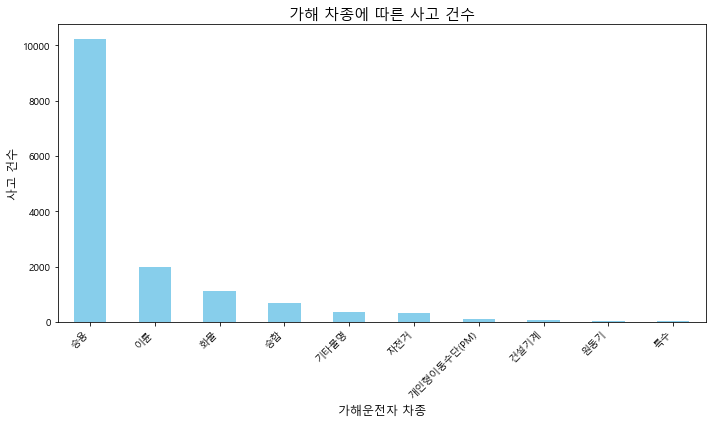

In [6]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10, 6))
crash_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('가해 차종에 따른 사고 건수', fontsize=15)
plt.xlabel('가해운전자 차종', fontsize=12)
plt.ylabel('사고 건수', fontsize=12)

# Display the plot
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

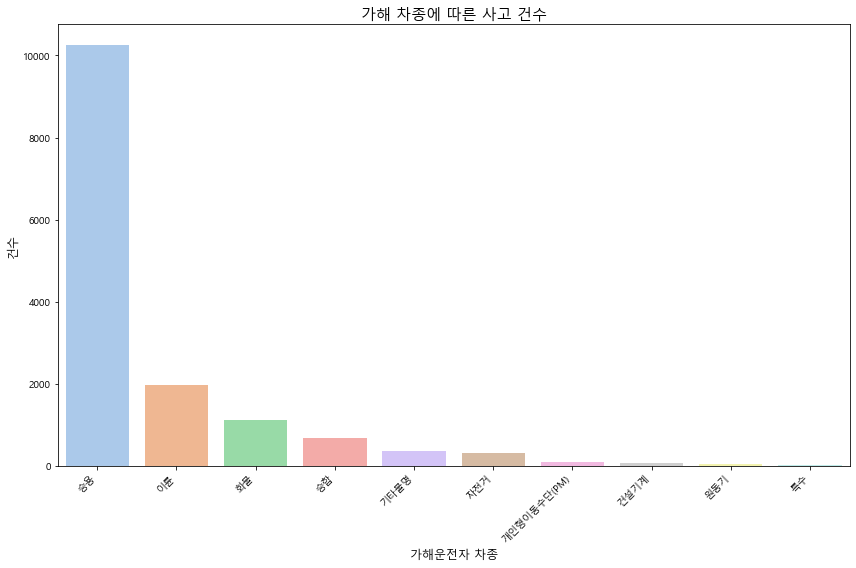

In [7]:
# 막대 그래프 생성
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(12, 8))
sns.barplot(x=crash_counts.index, y=crash_counts.values, palette="pastel")

# 그래프 제목 및 축 레이블 설정
plt.title('가해 차종에 따른 사고 건수', fontsize=15)
plt.xlabel('가해운전자 차종', fontsize=12)
plt.ylabel('건수', fontsize=12)
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전

# 그래프 표시
plt.tight_layout()
plt.show()

## 가해 차종 비율에 따른 피해 운전자 상해 정도

In [8]:
victim_df['피해운전자 상해정도'].unique()

array(['경상', '중상', '부상신고', '상해없음', '사망', '기타불명'], dtype=object)

In [9]:
victim_df['피해운전자 상해정도'].value_counts()

경상      9388
중상      4555
부상신고     523
상해없음     373
사망        55
기타불명      50
Name: 피해운전자 상해정도, dtype: int64

In [10]:
injury_ratio=victim_df['피해운전자 상해정도'].value_counts(normalize=True)*100
injury_ratio

경상      62.821199
중상      30.480460
부상신고     3.499732
상해없음     2.495985
사망       0.368041
기타불명     0.334582
Name: 피해운전자 상해정도, dtype: float64

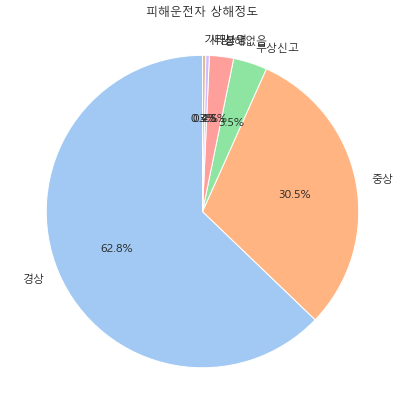

In [11]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")
plt.rc('font', family='Malgun Gothic')

# 원그래프 시각화
plt.figure(figsize=(7, 7))
plt.axis('equal')
plt.pie(injury_ratio, labels=injury_ratio.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('피해운전자 상해정도')
plt.show()

In [19]:
victim_df.pivot_table(index="피해운전자 상해정도", values="가해운전자 차종", aggfunc="describe")

,count,freq,top,unique
피해운전자 상해정도,,,,
경상,9388,6535,승용,10
기타불명,50,23,승용,7
부상신고,523,294,승용,9
사망,55,32,승용,5
상해없음,373,134,자전거,10
중상,4555,3310,승용,10


In [28]:
grouped=victim_df.groupby('가해운전자 차종')['피해운전자 상해정도'].value_counts().unstack().fillna(0)
grouped

피해운전자 상해정도,경상,기타불명,부상신고,사망,상해없음,중상
가해운전자 차종,,,,,,
개인형이동수단(PM),43.0,4.0,4.0,0.0,23.0,23.0
건설기계,39.0,0.0,2.0,3.0,2.0,22.0
기타불명,212.0,0.0,84.0,0.0,7.0,59.0
승용,6535.0,23.0,294.0,32.0,50.0,3310.0
승합,437.0,2.0,20.0,8.0,15.0,193.0
원동기,31.0,1.0,1.0,0.0,3.0,9.0
이륜,1232.0,11.0,64.0,3.0,131.0,539.0
자전거,126.0,4.0,17.0,0.0,134.0,38.0
특수,11.0,0.0,0.0,0.0,1.0,10.0


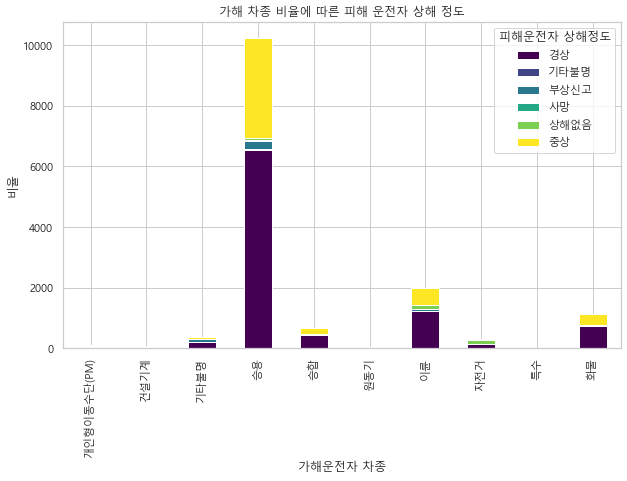

In [32]:
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.rc('font', family='Malgun Gothic')


import matplotlib.pyplot as plt
plt.title('가해 차종 비율에 따른 피해 운전자 상해 정도')
plt.xlabel('가해운전자 차종')
plt.ylabel('비율')
plt.legend(title='피해운전자 상해정도')
plt.show()

In [33]:
grouped1=victim_df.groupby('피해운전자 상해정도')['가해운전자 차종'].value_counts().unstack().fillna(0)
grouped1

가해운전자 차종,개인형이동수단(PM),건설기계,기타불명,승용,승합,원동기,이륜,자전거,특수,화물
피해운전자 상해정도,,,,,,,,,,
경상,43.0,39.0,212.0,6535.0,437.0,31.0,1232.0,126.0,11.0,722.0
기타불명,4.0,0.0,0.0,23.0,2.0,1.0,11.0,4.0,0.0,5.0
부상신고,4.0,2.0,84.0,294.0,20.0,1.0,64.0,17.0,0.0,37.0
사망,0.0,3.0,0.0,32.0,8.0,0.0,3.0,0.0,0.0,9.0
상해없음,23.0,2.0,7.0,50.0,15.0,3.0,131.0,134.0,1.0,7.0
중상,23.0,22.0,59.0,3310.0,193.0,9.0,539.0,38.0,10.0,352.0


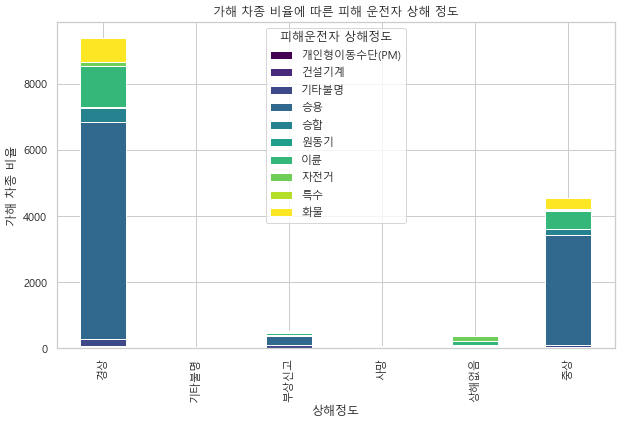

In [35]:
grouped1.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.rc('font', family='Malgun Gothic')


import matplotlib.pyplot as plt
plt.title('가해 차종 비율에 따른 피해 운전자 상해 정도')
plt.xlabel('상해정도')
plt.ylabel('가해 차종 비율')
plt.legend(title='피해운전자 상해정도')
plt.show()

## 가해 운전자 연령대와 피해 운전자 연령대

In [36]:
victim_df["가해운전자 연령"].unique()

array(['57세', '67세', '28세', '59세', '58세', '33세', '36세', '45세', '51세',
       '71세', '31세', '23세', '65세', '70세', '64세', '38세', '50세', '21세',
       '49세', '53세', '42세', '55세', '74세', '46세', '62세', '26세', '40세',
       '34세', '78세', '39세', '56세', '41세', '47세', '44세', '29세', '60세',
       '54세', '66세', '69세', '25세', '35세', '30세', '미분류', '48세', '61세',
       '37세', '63세', '27세', '24세', '43세', '77세', '73세', '20세', '52세',
       '68세', '32세', '72세', '75세', '17세', '79세', '18세', '19세', '22세',
       '82세', '15세', '87세', '76세', '80세', '13세', '11세', '85세', '83세',
       '9세', '81세', '84세', '16세', '91세', '7세', '86세', '12세', '10세', '14세',
       '90세', '88세'], dtype=object)

In [37]:
victim_df["가해운전자 연령"].value_counts()

61세    406
미분류    371
60세    365
62세    361
52세    349
      ... 
91세      2
7세       1
10세      1
90세      1
88세      1
Name: 가해운전자 연령, Length: 84, dtype: int64

In [38]:
victim_df["가해운전자 연령"] = victim_df["가해운전자 연령"].replace('미분류', 0)
victim_df['피해운전자 연령'] = victim_df['피해운전자 연령'].replace('미분류', 0)

In [41]:
import re

# 숫자 부분만 추출하는 함수 정의
def remove_non_numeric(age):
    if isinstance(age, str):
        # 정규 표현식을 사용하여 숫자만 추출
        numeric_part = re.findall(r'\d+', age)
        if numeric_part:
            return int(numeric_part[0])
    return age

# '피해운전자 연령' 컬럼에 함수 적용
victim_df['피해운전자 연령'] =victim_df['피해운전자 연령'].apply(remove_non_numeric)
victim_df["가해운전자 연령"] = victim_df["가해운전자 연령"].apply(remove_non_numeric)


# 결과 확인
print(victim_df['피해운전자 연령'].unique())
print(victim_df["가해운전자 연령"].unique())

[26 60 50 22 23 35 30 21 49 51 73 19 25 28 38 61 16 66 46 33 57 41 44 48
 24 43 56 18 39 47 52 36 40 65 31 17 69 53 20 81 32 29 27 55 64 54 42 37
 59 45 79 34 63 71 75 62 58 78 77 67 72 68 76 70  0 74 86 14 84 87 80 82
 83 15]
[57 67 28 59 58 33 36 45 51 71 31 23 65 70 64 38 50 21 49 53 42 55 74 46
 62 26 40 34 78 39 56 41 47 44 29 60 54 66 69 25 35 30  0 48 61 37 63 27
 24 43 77 73 20 52 68 32 72 75 17 79 18 19 22 82 15 87 76 80 13 11 85 83
  9 81 84 16 91  7 86 12 10 14 90 88]


In [45]:
import pandas as pd

# 라벨링 함수
def label_age(age):
    if age == 0:
        return '0'
    elif 1 <= age <10:
        return '10대 미만'
    elif 10 <= age <20:
        return '10대'
    elif 20 <= age <30:
        return '20대'
    elif 30 <= age <40:
        return '30대'
    elif 40 <= age <50:
        return '40대'
    elif 50 <= age <60:
        return '50대'
    elif 60 <= age <70:
        return '60대'
    elif 70 <= age <80:
        return '70대'
    else:
        return '80세 이상'

# '가해운전자 연령' 컬럼에 라벨링 적용
victim_df['가해운전자 연령대'] = victim_df['가해운전자 연령'].apply(label_age)
age_groups = ['0','10대 미만', '10대', '20대', '30대', '40대','50대','60대','70대','80세 이상']
offend_age_group_counts = victim_df['가해운전자 연령대'].value_counts().reindex(age_groups, fill_value=0)

# '피해운전자 연령' 컬럼에 라벨링 적용
victim_df['피해운전자 연령대'] =victim_df['피해운전자 연령'].apply(label_age)
victim_age_group_counts = victim_df['피해운전자 연령대'].value_counts().reindex(age_groups, fill_value=0)


print(offend_age_group_counts)
print(victim_age_group_counts)

0          371
10대 미만       6
10대        243
20대       1662
30대       2560
40대       2479
50대       3158
60대       3175
70대       1160
80세 이상     130
Name: 가해운전자 연령대, dtype: int64
0            9
10대 미만       0
10대        479
20대       3650
30대       4091
40대       3423
50대       2131
60대        928
70대        205
80세 이상      28
Name: 피해운전자 연령대, dtype: int64


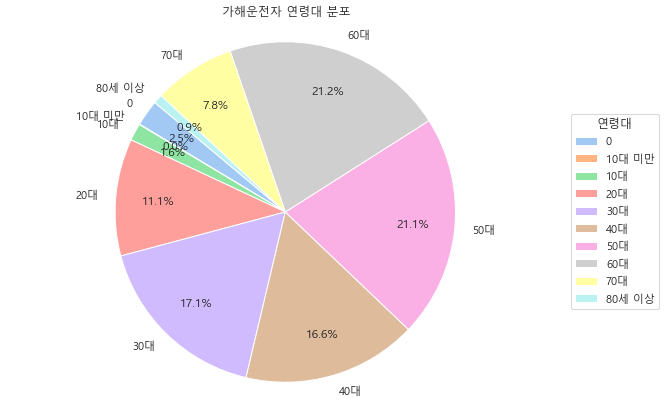

In [46]:
# 가해자 비중 원그래프 생성
plt.figure(figsize=(10, 7))
plt.pie(offend_age_group_counts, labels=age_groups, autopct='%1.1f%%', startangle=140,  labeldistance=1.1, pctdistance=0.75, colors=sns.color_palette("pastel"))
plt.legend( age_groups, title="연령대", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('가해운전자 연령대 분포')
plt.axis('equal')  # 원을 원형으로 유지
plt.show()

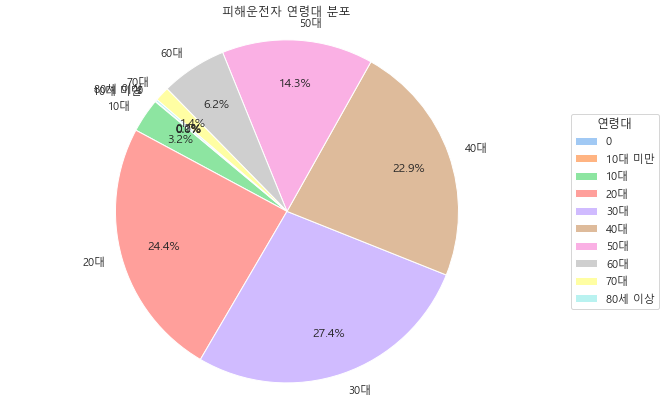

In [44]:
# 피해자 비중 원그래프 생성
plt.figure(figsize=(10, 7))
plt.pie(victim_age_group_counts, labels=age_groups, autopct='%1.1f%%', startangle=140,  labeldistance=1.1, pctdistance=0.75, colors=sns.color_palette("pastel"))
plt.legend( age_groups, title="연령대", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('피해운전자 연령대 분포')
plt.axis('equal')  # 원을 원형으로 유지
plt.show()

 ## 가해 운전자 성별과 피해 운전자 성별 비율

In [47]:
victim_df['피해운전자 성별'] = victim_df['피해운전자 성별'].replace(0, '기타불명')
victim_df['가해운전자 성별'] = victim_df['가해운전자 성별'].replace(0, '기타불명')

In [48]:
victim_df['피해운전자 성별'].value_counts()

남       14427
여         508
기타불명        9
Name: 피해운전자 성별, dtype: int64

In [49]:
sex_proportion=victim_df['피해운전자 성별'].value_counts(normalize=True) * 100
sex_proportion

남       96.540418
여        3.399358
기타불명     0.060225
Name: 피해운전자 성별, dtype: float64

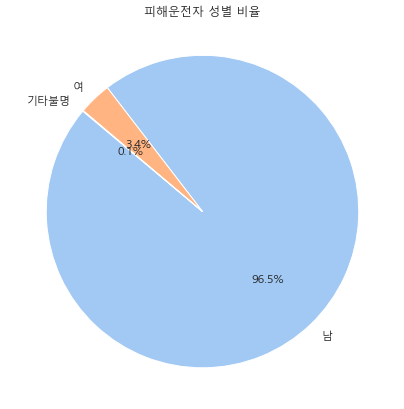

In [50]:
sns.set(style="whitegrid")
plt.rc('font', family='Malgun Gothic')

# 파이 차트 시각화
plt.figure(figsize=(7, 7))
plt.axis('equal')
plt.pie(sex_proportion, labels=sex_proportion.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('피해운전자 성별 비율')
plt.show()

In [51]:
victim_df['가해운전자 성별'].value_counts()

남       11898
여        2675
기타불명      371
Name: 가해운전자 성별, dtype: int64

In [52]:
sex_proportion=victim_df['가해운전자 성별'].value_counts(normalize=True) * 100
sex_proportion

남       79.617238
여       17.900161
기타불명     2.482602
Name: 가해운전자 성별, dtype: float64

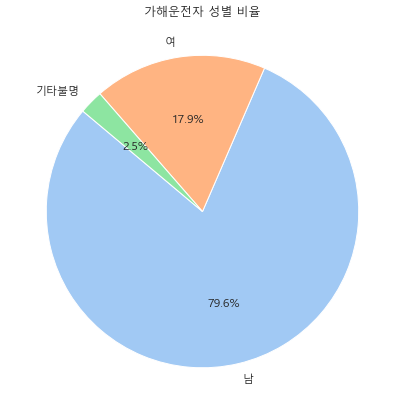

In [53]:
sns.set(style="whitegrid")
plt.rc('font', family='Malgun Gothic')

# 파이 차트 시각화
plt.figure(figsize=(7, 7))
plt.axis('equal')
plt.pie(sex_proportion, labels=sex_proportion.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('가해운전자 성별 비율')
plt.show()

## 가해 운전자 상해 정도와 피해 운전자 상해 정도 시각화

In [56]:
cross_tab = pd.crosstab(victim_df['가해운전자 상해정도'], victim_df['피해운전자 상해정도'], normalize='index')
cross_tab

피해운전자 상해정도,경상,기타불명,부상신고,사망,상해없음,중상
가해운전자 상해정도,,,,,,
경상,0.515239,0.023222,0.020319,0.001451,0.227866,0.211901
기타불명,0.653420,0.002773,0.101664,0.000924,0.007394,0.233826
부상신고,0.356209,0.022876,0.068627,0.000000,0.320261,0.232026
상해없음,0.642525,0.001576,0.029632,0.004019,0.005359,0.316889
중상,0.359551,0.022472,0.011236,0.011236,0.235955,0.359551


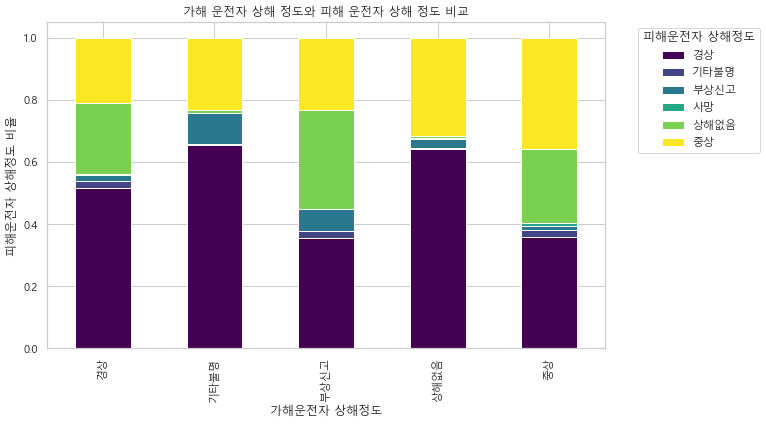

In [59]:
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('가해 운전자 상해 정도와 피해 운전자 상해 정도 비교')
plt.xlabel('가해운전자 상해정도')
plt.ylabel('피해운전자 상해정도 비율')
plt.legend(title='피해운전자 상해정도', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 법규 위반 비율

In [60]:
victim_df['법규위반'].value_counts()

안전운전불이행      7195
신호위반         2694
안전거리미확보      2057
교차로운행방법위반     809
중앙선침범         716
기타            584
직진우회전진행방해     493
차로위반          226
불법유턴          170
Name: 법규위반, dtype: int64

In [62]:
law_violation_counts = victim_df['법규위반'].value_counts(normalize=True)*100
law_violation_counts

안전운전불이행      48.146413
신호위반         18.027302
안전거리미확보      13.764722
교차로운행방법위반     5.413544
중앙선침범         4.791221
기타            3.907923
직진우회전진행방해     3.298983
차로위반          1.512313
불법유턴          1.137580
Name: 법규위반, dtype: float64

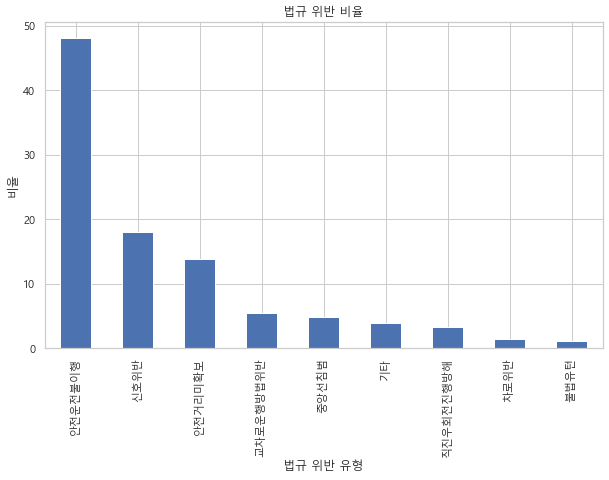

In [65]:
# 시각화
law_violation_counts.plot(kind='bar', figsize=(10, 6))
plt.title('법규 위반 비율')
plt.xlabel('법규 위반 유형')
plt.ylabel('비율')
plt.show()

<AxesSubplot:ylabel='법규위반'>

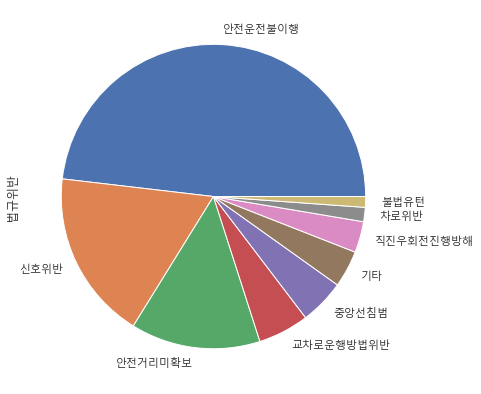

In [67]:
law_violation_counts.plot.pie(figsize=(7,7))

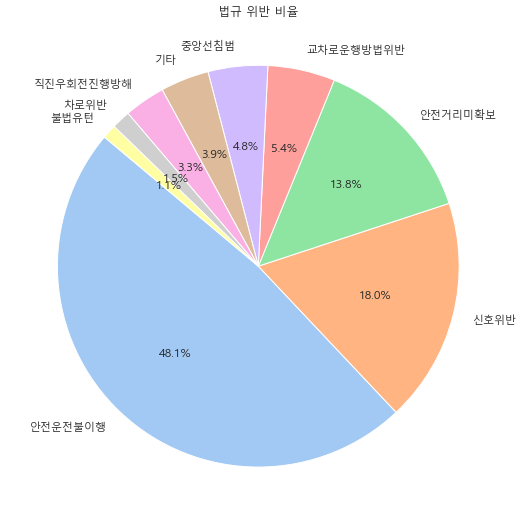

In [70]:
sns.set(style="whitegrid")
plt.rc('font', family='Malgun Gothic')

# 파이 차트 시각화
plt.figure(figsize=(9, 9))
plt.axis('equal')
plt.pie(law_violation_counts, labels=law_violation_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('법규 위반 비율')
plt.show()